In [1]:
!pip install transformers
!pip install ckip-transformers

import transformers
import ckip_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.2 MB/s eta 0:00:00


In [43]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker
import pandas as pd
import unicodedata

In [5]:
ws = CkipWordSegmenter(model="bert-base", device = -1)
pos = CkipPosTagger(model="bert-base", device = -1)
ner = CkipNerChunker(model="bert-base", device = -1)

In [22]:
df = pd.read_csv("ptt_gossiping_16533.csv", index_col='Unnamed: 0')

In [52]:
# gp_list = [text for text in df.title]
# gp_list = [text[1] for text in df['title'].str.split('] ')]

# normalizedList = [unicodedata.normalize('NFKC', line) for line in list(df['title'].unique())]
# gp_list = []
# for i in df['title'].str.split('] ').replace(' ', ''):
#   try: gp_list.append(i[1])
#   except: pass

gp_list = []
for i in df['title'].str.split('] ').replace(' ', ''):
  try: gp_list.append(i[1])
  except: pass

normalizedList = [unicodedata.normalize('NFKC', line) for line in gp_list]

In [53]:
gp_sentence = list(set(normalizedList))

WS / POS

In [58]:
ws_annotated = ws(gp_sentence)

Inference: 100%|██████████| 47/47 [32:02<00:00, 40.89s/it]


In [59]:
pos_annotated = pos(ws_annotated)

Inference: 100%|██████████| 60/60 [38:54<00:00, 38.91s/it]


In [60]:
def filter_by_pos(sent, pos_filter):
  filter_pos_sent = []
  for j, (word, pos) in enumerate(zip(sent[0], sent[1])):
    if pos[0] in pos_filter:
      filter_pos_sent.append(word)
  return filter_pos_sent

In [61]:
pos_filter_N = ["N"]
ws_pos_annotated_N = zip(ws_annotated, pos_annotated)
filter_pos_N = [filter_by_pos(sent, pos_filter_N) for sent in ws_pos_annotated_N]

In [62]:
pos_filter_V = ["V"]
ws_pos_annotated_V = zip(ws_annotated, pos_annotated)
filter_pos_V = [filter_by_pos(sent, pos_filter_V) for sent in ws_pos_annotated_V]

NER

In [ ]:
ner_annotated = ner(gp_sentence)

Inference:  98%|█████████▊| 46/47 [30:09<00:38, 38.21s/it]

In [70]:
def filter_by_ner(sent, ner_filter):
  filter_ner_sent = []
  for j, word in enumerate(sent):
    if word.ner in ner_filter:
      filter_ner_sent.append(word.word)
  return filter_ner_sent

In [71]:
ner_filter_P = ["PERSON"]
filter_ner_P = [filter_by_ner(sent, ner_filter_P) for sent in ner_annotated]

In [72]:
ner_filter_PG = ["PERSON", "GPE"]
filter_ner_PG = [filter_by_ner(sent, ner_filter_PG) for sent in ner_annotated]

WordCloud

In [73]:
from wordcloud import WordCloud
from google.colab.patches import cv2, cv2_imshow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import collections

In [83]:
worldCloudList_1 = []
for i in filter_pos_N:
  for j in i:
      worldCloudList_1.append(j)
counter_1 = collections.Counter(worldCloudList_1)

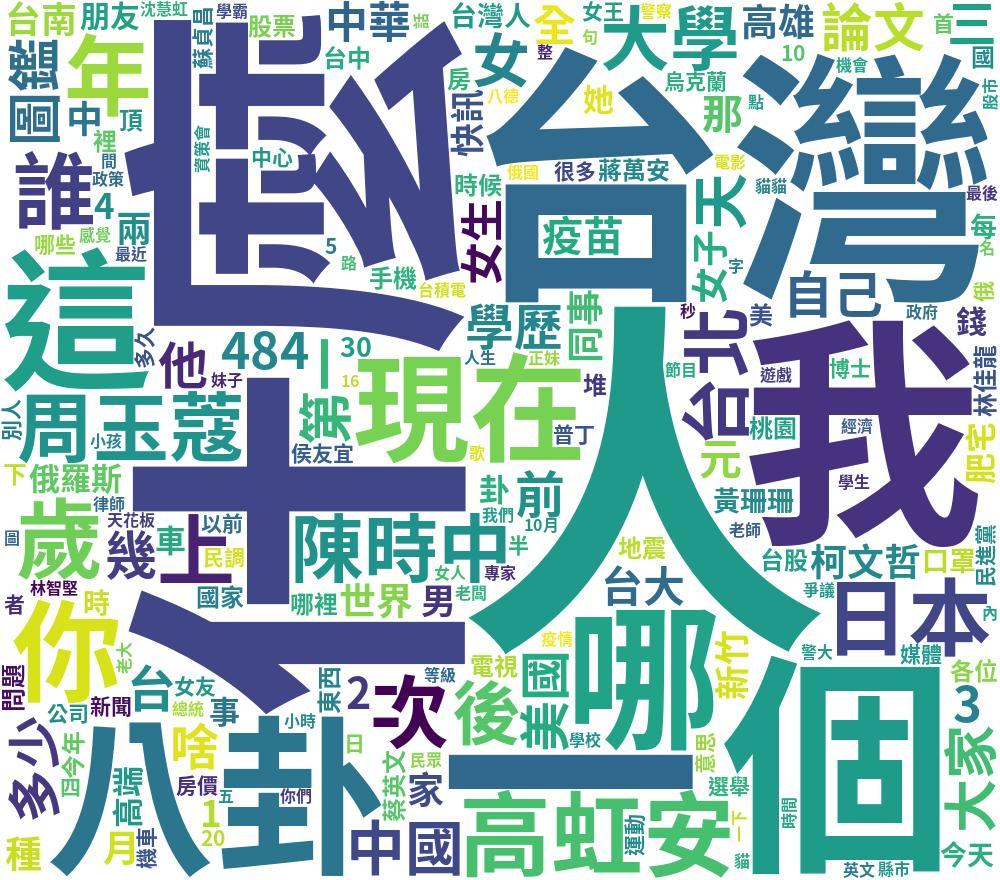

In [86]:
font = "NotoSansTC-Bold.otf"
wd1 = WordCloud(font_path = font, background_color="white", width = 1000, height = 880).generate_from_frequencies(counter_1)

wd1.to_image().save("1.jpg")
image1 = cv2.imread("1.jpg")
cv2_imshow(image1)

In [88]:
worldCloudList_2 = []
for i in filter_pos_V:
  for j in i:
      worldCloudList_2.append(j)
counter_2 = collections.Counter(worldCloudList_2)

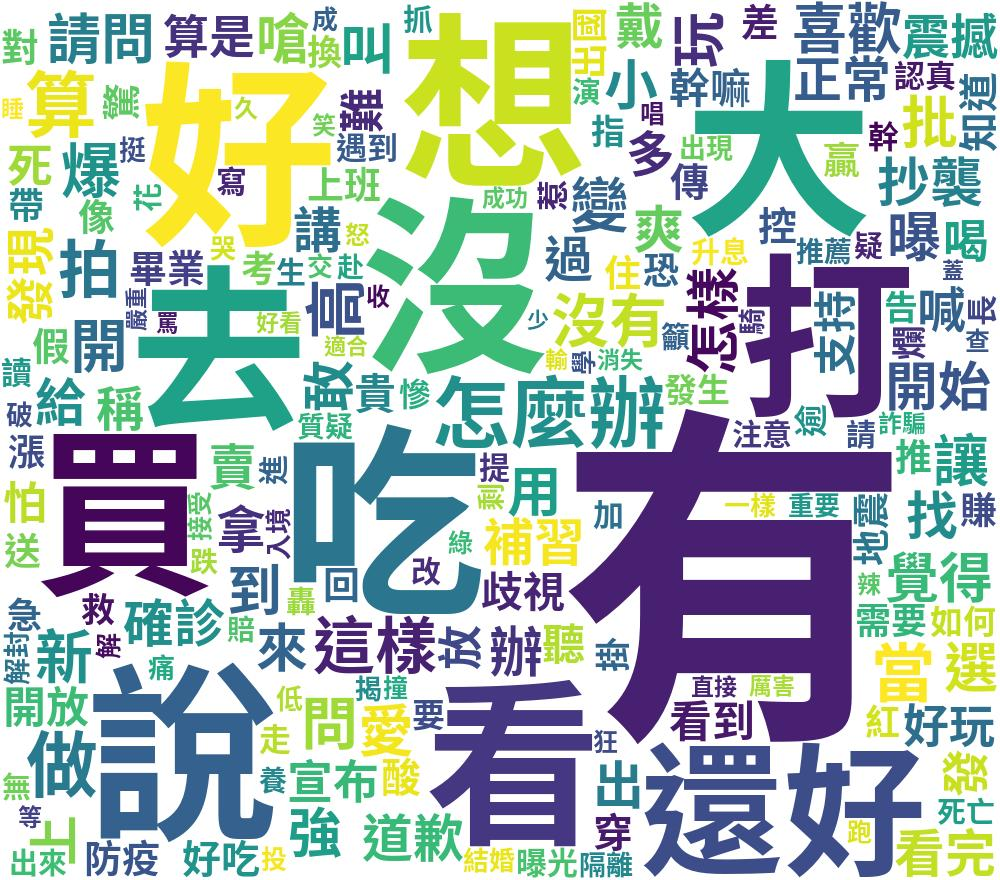

In [93]:
wd2 = WordCloud(font_path = font, background_color="white", width = 1000, height = 880).generate_from_frequencies(counter_2)

wd2.to_image().save("2.jpg")
image2 = cv2.imread("2.jpg")
cv2_imshow(image2)

In [94]:
worldCloudList_3 = []
for i in filter_ner_P:
  for j in i:
      worldCloudList_3.append(j)
counter_3 = collections.Counter(worldCloudList_3)

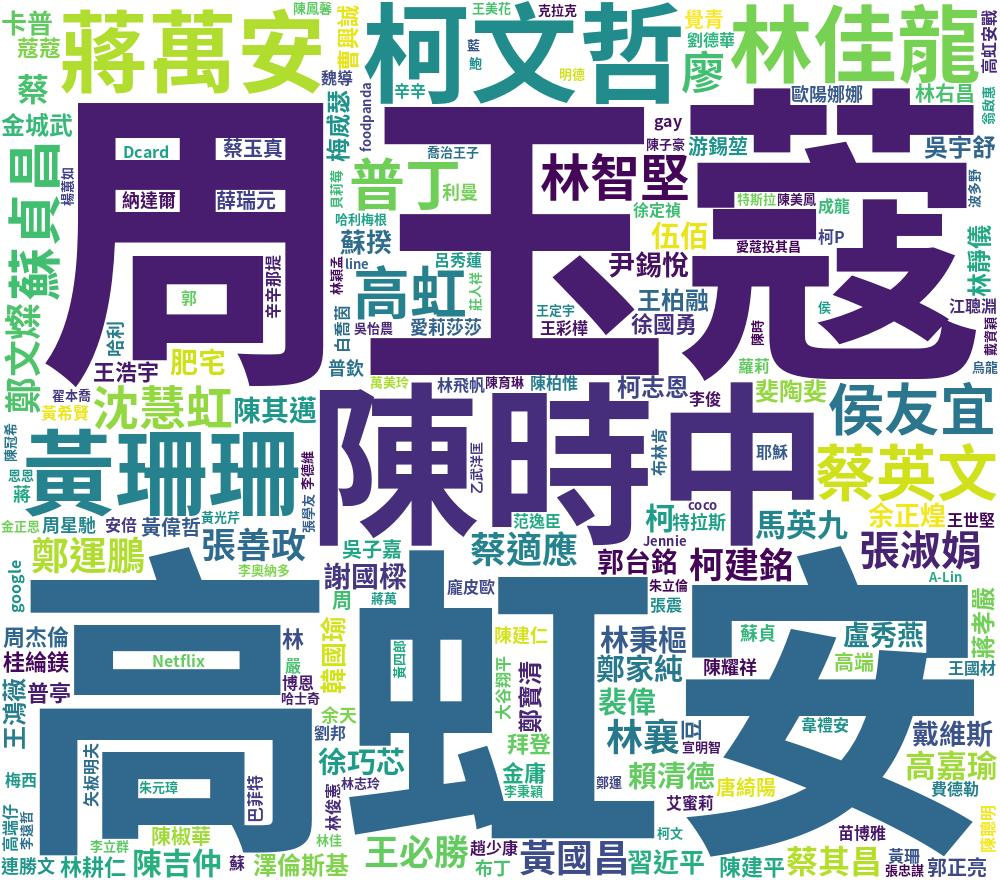

In [95]:
wd3 = WordCloud(font_path = font, background_color="white", width = 1000, height = 880).generate_from_frequencies(counter_3)

wd3.to_image().save("3.jpg")
image3 = cv2.imread("3.jpg")
cv2_imshow(image3)

In [96]:
worldCloudList_4 = []
for i in filter_ner_PG:
  for j in i:
      worldCloudList_4.append(j)
counter_4 = collections.Counter(worldCloudList_4)

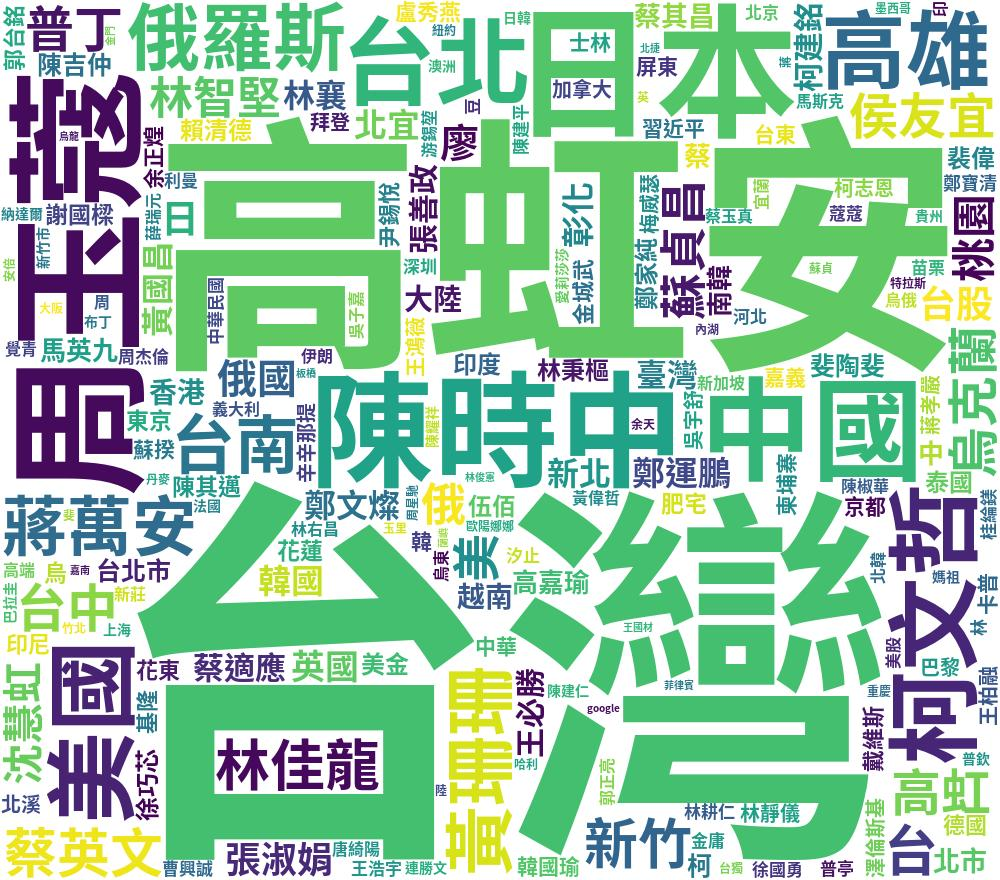

In [97]:
wd4 = WordCloud(font_path = font, background_color="white", width = 1000, height = 880).generate_from_frequencies(counter_4)

wd4.to_image().save("4.jpg")
image4 = cv2.imread("4.jpg")
cv2_imshow(image4)